## Nonlinear Model Hyperbolic Equation

Recall when we derived the model hyperbolic PDE from the Euler equations, we assumed that the coefficient, $c$, was not a function of $u(x,t)$. This assumption made the non-linear PDE, a linear PDE. As generalization of our model equation, what happens when the constant $c$ is no longer constant but a function of the velocity? For instance, let us take the equation

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

where the coefficient $c$ is not constant, but equal to $u$. Also note, that if we assume that $f = (1/2) u^2$, then we get the equation

$$
\frac{\partial u}{\partial t} + \frac{\partial f}{\partial x} = 0
$$

which we should recognize as having a very similar form to the Euler equations. This equation is often referred to as the inviscid Burger's equation. 

### Shock formation

Unlike the linear hyperbolic model equation, the non-linear equation develops a discontinuity in the solution even if the initial waveform is continuous. For a shock wave to form, the initial value of $u$ to the left of some value $x$ moves faster than the waves traveling to the right of the position $x$. The fast waves will overtake the slow waves, causing a discontinuity. Consider the initial condition,

$$
u(x,0) = F(x) = \begin{cases} 
            u_l & x \lt 0 \\
            u_l - \alpha x & 0. \leq x \leq x_r \\
            u_r & x \gt x_r 
           \end{cases}
$$

We can solve this equation using the method of characteristics, which gives us a solution

$$
u(x,t) = \begin{cases} 
            u_l & x \lt u_l t \\
            \frac{ u_l - \alpha x}{1 - \alpha t} & u_l t \leq x \leq x_r + u_r t \\
            u_r & x \gt x_r + u_r t
           \end{cases}
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

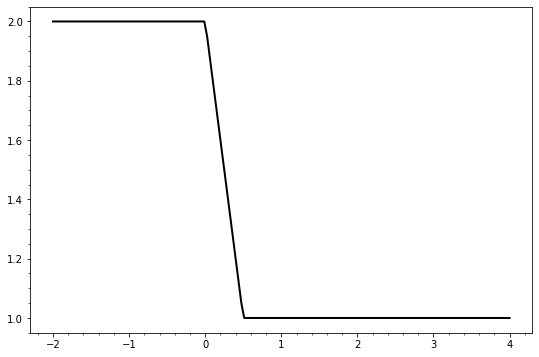

In [2]:
# Define the domain
Lx = 2.0
nx = 161
x = np.linspace(-Lx, 2.0*Lx, nx)
u = np.zeros_like(x)

ul = 2.0
ur = 1.0
alpha = 2.0

x_r = (ul - ur) / alpha

for i in range(len(x)):
    if x[i] < 0.0:
        u[i] = ul
    elif x[i] > x_r:
        u[i] = ur
    else:
        u[i] = ul - alpha * x[i]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

line = ax.plot(x, u, lw=2, c='k')

ax.minorticks_on()

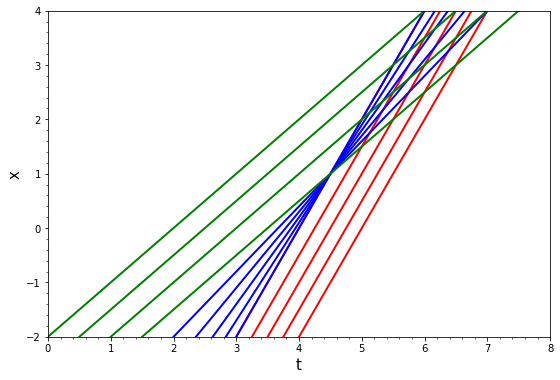

In [3]:
t1 = np.zeros((nx,5),dtype=np.float64)

eta_left = [-2,-1.5,-1,-0.5,0]
for i in range(len(eta_left)):
    t1[:,i] = (x[:] - eta_left[i]) / ul
    
t2 = np.zeros((nx,5),dtype=np.float64)

eta_middle = [0.0, 0.1, 0.2, 0.3, 0.4]
for i in range(len(eta_middle)):
    t2[:,i] = (x[:] - eta_middle[i]) / (ul - alpha * eta_middle[i])

t3 = np.zeros((nx,5),dtype=np.float64)

eta_right = [0.5, 1.0, 1.5, 2.0]
for i in range(len(eta_right)):
    t3[:,i] = (x[:] - eta_right[i]) / ur

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for i in range(len(eta_left)):
    line = ax.plot(t1[:,i]+4, x[:], lw=2, c='r')
for i in range(len(eta_middle)):
    line = ax.plot(t2[:,i]+4, x[:], lw=2, c='b')
for i in range(len(eta_right)):
    line = ax.plot(t3[:,i]+4, x[:], lw=2, c='g')

ax.set_xlim((0,8))
ax.set_ylim((-2,4))
ax.set_xlabel('t', fontsize=15.0)
ax.set_ylabel('x', fontsize=15.0)
    
ax.minorticks_on()

/Users/jcschulz/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


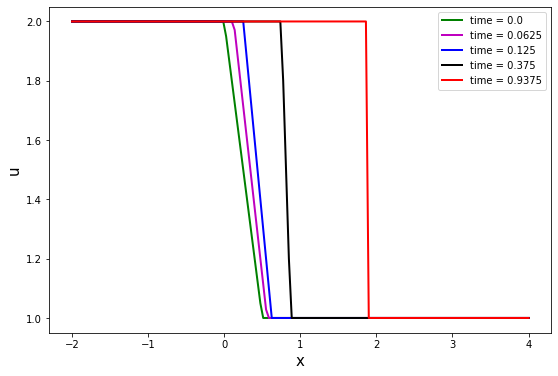

In [4]:
nt = 81
t = np.linspace(0, 5, nt)

U = np.zeros((nx,nt))

for i in range(len(t)):
    for j in range(len(x)):
        if x[j] < ul * t[i]:
            U[j,i] = ul
        elif x[j] > x_r + ur * t[i]:
            U[j,i] = ur
        else:
            U[j,i] = (ul - alpha * x[j]) / (1 - alpha * t[i])
            
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

line = ax.plot(x[:], U[:,0], lw=2, c='g', label=f'time = {t[0]}')
line = ax.plot(x[:], U[:,1], lw=2, c='m', label=f'time = {t[1]}')
line = ax.plot(x[:], U[:,2], lw=2, c='b', label=f'time = {t[2]}')
line = ax.plot(x[:], U[:,6], lw=2, c='k', label=f'time = {t[6]}')
line = ax.plot(x[:], U[:,15], lw=2, c='r', label=f'time = {t[15]}')

ax.set_xlabel('x', fontsize=15.0)
ax.set_ylabel('u', fontsize=15.0)
ax.legend(loc=1)